# Introduction

This script performs time series analysis on a dataset containing sales data from a furniture store. The goal is to forecast future sales based on historical data. 
Time series analysis is crucial for businesses to understand patterns, trends, and seasonal variations in their sales, enabling better decision-making and resource allocation.

Time series analysis entails examining sequential data points collected over a consistent interval, typically over time. By leveraging this historical information, businesses can uncover underlying patterns, seasonality, and trends within their sales data.


# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose  

from sklearn.model_selection import train_test_split

# 2. Loading Dataset

In [2]:

sales = pd.read_csv('Super_Store_data.csv', encoding='latin1')


# 3. Data Exploration

In [3]:
sales.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
sales.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [5]:
sales.shape

(2121, 21)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [7]:
sales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


# Exploratory Data Analysis

In [8]:
sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

We can see that there are no null values present in the dataset.

Let's check the number of unique values in each column.

In [9]:
dict = {}
for i in list(sales.columns):
    dict[i] = sales[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Row ID,2121
Order ID,1764
Order Date,889
Ship Date,960
Ship Mode,4
Customer ID,707
Customer Name,707
Segment,3
Country,1
City,371


We can observe that the Row Id column may not be helpful as all values are unique identifier, so we can drop it.

In [10]:
sales = sales.drop(columns=['Row ID'])
sales.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


We can observe that Country column has only one value i.e. United States. So we can drop Country column as well. Same with category column and other columns.

In [11]:
sales = sales.drop(columns=['Order ID', 'Country', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 
                         'Postal Code', 'Product ID', 'Product Name', 'Sub-Category', 'Category', 'Region', 'State'])
sales.head(3)

,Order Date,Sales,Quantity,Discount,Profit
0,11/8/2016,261.9600,2,0.00,41.9136
1,11/8/2016,731.9400,3,0.00,219.5820
2,10/11/2015,957.5775,5,0.45,-383.0310


Checking for duplicate values:

In [12]:
duplicate_rows = sales[sales.duplicated()]
duplicate_rows.head()

,Order Date,Sales,Quantity,Discount,Profit
720,4/23/2014,281.372,2,0.3,-12.0588
1238,7/4/2016,25.400,5,0.0,8.6360
1759,7/5/2015,4.928,2,0.2,0.7392


In [13]:
sales = sales.drop_duplicates()
sales.head()

,Order Date,Sales,Quantity,Discount,Profit
0,11/8/2016,261.9600,2,0.00,41.9136
1,11/8/2016,731.9400,3,0.00,219.5820
2,10/11/2015,957.5775,5,0.45,-383.0310
3,6/9/2014,48.8600,7,0.00,14.1694
4,6/9/2014,1706.1840,9,0.20,85.3092


Now, we'll convert the 'Order Date' column to datetime format and set it as the index of the DataFrame.

In [14]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales.set_index('Order Date', inplace=True)

The below code computes the total sales revenue for each month, providing a time series of monthly sales data.

In [15]:
monthly_sales = sales['Sales'].resample('M').sum()

In [16]:
monthly_sales

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7663.4650
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13669.4920
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13043.1190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30    




# Data Visualization

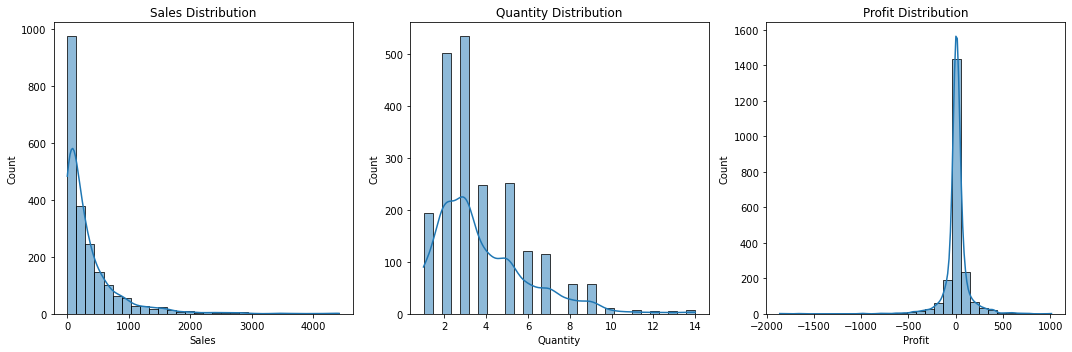

In [17]:
plt.figure(figsize=(15, 5))

# Sales Distribution
plt.subplot(1, 3, 1)
sns.histplot(sales['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')

# Quantity Distribution
plt.subplot(1, 3, 2)
sns.histplot(sales['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')

# Profit Distribution
plt.subplot(1, 3, 3)
sns.histplot(sales['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')

plt.tight_layout()
plt.show()

Time Series Plot of Monthly Sales


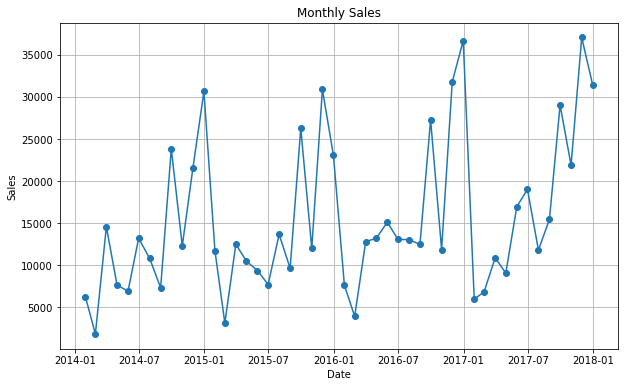

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

The pattern in the dataset suggests monthly sales exhibit seasonality with recurring peaks and troughs, accompanied by an overall upward trend.

Histogram of Sales Distribution


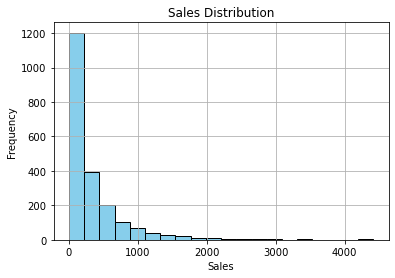

In [19]:
plt.figure(figsize=(6, 4))
plt.hist(sales['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The sales distribution plot illustrates that a significant portion of sales falls within lower values, indicating a skewed distribution with a long tail towards higher sales values.

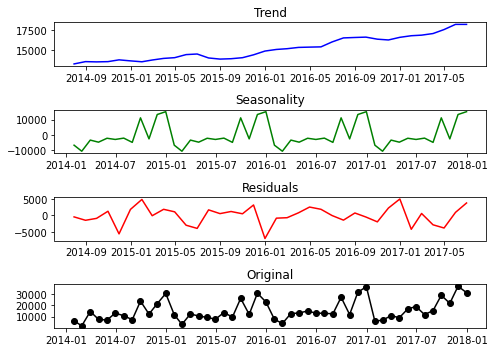

In [20]:
# Seasonal Decomposition Plot
decomposition = seasonal_decompose(monthly_sales, model='additive')
plt.figure(figsize=(7,5))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', label='Original', color='black')
plt.title('Original')

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Order Date'>

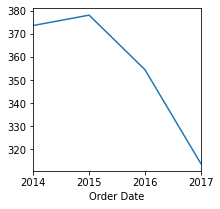

In [21]:
# Resample the data to compute annual average of the 'Sales' column
Y_Sales = sales['Sales'].resample('Y').mean()

Y_Sales.plot(figsize =(3,3))

<AxesSubplot:xlabel='Order Date'>

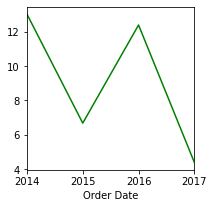

In [22]:
# Resample the data to compute annual average of the 'Profit' column
Y_Profit = sales['Profit'].resample('Y').mean()

Y_Profit.plot(figsize =(3,3), c= "g")

<AxesSubplot:xlabel='Order Date'>

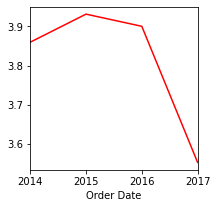

In [23]:
# Resample the data to compute annual average of the 'Quantity' column
Y_Quantity = sales['Quantity'].resample('Y').mean()

Y_Quantity.plot(figsize =(3,3), c ="r")

<AxesSubplot:xlabel='Order Date'>

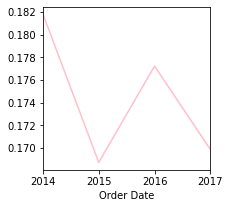

In [24]:
# Resample the data to compute annual average of the 'Discount' column.
Y_Discount = sales['Discount'].resample('Y').mean()

Y_Discount.plot(figsize =(3,3), c ="pink", )

Decompose the time series into trend, seasonality, and residuals


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(monthly_sales, model='multiplicative', period=12)

# ADF Test

In [26]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(monthly_sales)
print("ADF Statistic: %f" % adfuller_result[0])
print('p-value: %f' % adfuller_result[1])

ADF Statistic: -4.696804
p-value: 0.000085


The Augmented Dickey-Fuller (ADF) test statistic of -4.697056 with a p-value of 0.000085 suggests strong evidence against the null hypothesis (H0), leading to the rejection of the null hypothesis. This indicates that the data has no unit root and is stationary, implying that it does not exhibit a trend and its statistical properties remain constant over time.

A unit root is indicative of non-stationarity in the time series. Stationarity is a desirable property in time series analysis, as it implies that the statistical properties of the data, such as mean and variance, do not change over time. Non-stationarity, on the other hand, implies that the statistical properties of the data are time-dependent and may exhibit trends or patterns.

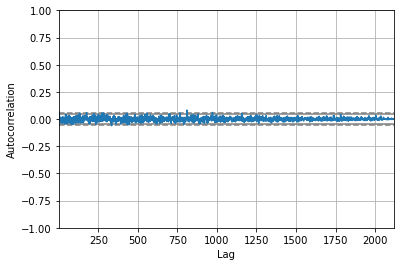

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales['Sales'])
plt.show()


# ACF & PACF

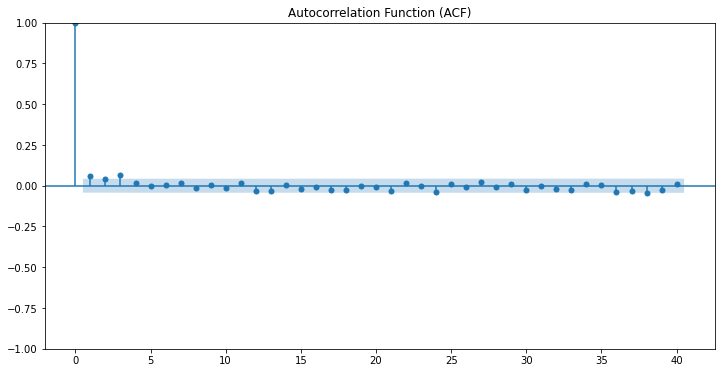

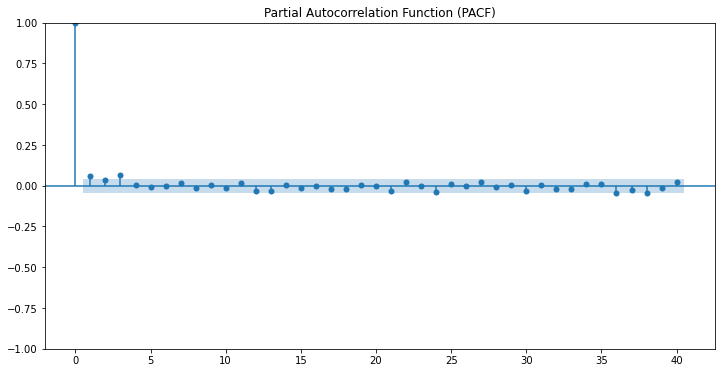

In [28]:
import statsmodels.api as sm

# Plot ACF
fig, ax1 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(sales['Sales'], lags=40, ax=ax1)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
fig, ax2 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(sales['Sales'], lags=40, ax=ax2)
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()

The ACF measures the correlation between a variable's current value and its past values at different lags, while the PACF measures the correlation between a variable's current value and its past values after removing the effect of intervening observations.

# Data Preparation

In [29]:
# Split data into train and test sets
X = np.arange(len(monthly_sales)).reshape(-1, 1)
y = monthly_sales.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Fitting

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model
arima_model = ARIMA(y_train, order=(5,1,0))
arima_model_fit = arima_model.fit()

# Fit SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()


In [31]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -389.499
Date:                Sun, 21 Apr 2024   AIC                            790.999
Time:                        00:45:25   BIC                            800.664
Sample:                             0   HQIC                           794.407
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6002      0.244     -2.465      0.014      -1.078      -0.123
ar.L2         -0.4840      0.292     -1.658      0.097      -1.056       0.088
ar.L3         -0.2185      0.315     -0.695      0.487      -0.835       0.398
ar.L4         -0.2700      0.392     -0.689      0.491      -1.038       0.498
ar.L5         -0.3323      0.247     -1.346      0.178      -0.816       0.152
sigma2      8.595e+07   1.13e-09   7.62e+16      0.000     8.6e+07     8.6e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.96   Prob(JB):                         0.64
Heteroskedasticity (H):               1.80   Skew:                             0.20
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+33. Standard errors may be unstable.
"""

In [32]:
sarima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -250.029
Date:                            Sun, 21 Apr 2024   AIC                            510.059
Time:                                    00:45:25   BIC                            516.153
Sample:                                         0   HQIC                           511.749
                                             - 38                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4772      0.199      2.393      0.017       0.086       0.868
ma.L1         -0.8593      0.175     -4.922      0.000      -1.201      -0.517
ar.S.L12      -0.9847      0.178     -5.546      0.000      -1.333      -0.637
ma.S.L12       0.9012      0.591      1.526      0.127      -0.256       2.059
sigma2      2.609e+07   3.49e-08   7.48e+14      0.000    2.61e+07    2.61e+07
===================================================================================
Ljung-Box (L1) (Q):                   4.27   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.04   Prob(JB):                         0.82
Heteroskedasticity (H):               0.80   Skew:                             0.22
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.72e+31. Standard errors may be unstable.
"""

# Forecasting

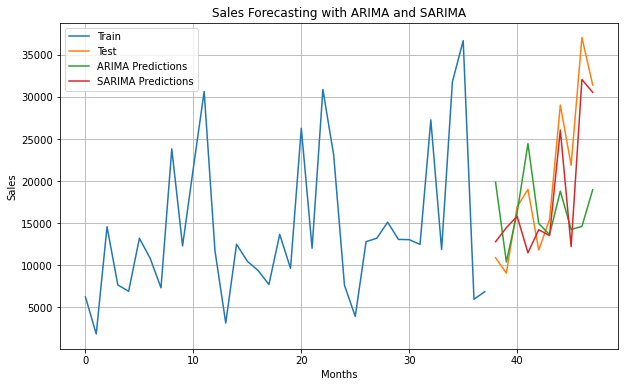

In [33]:
arima_predictions = arima_model_fit.forecast(steps=len(X_test))
sarima_predictions = sarima_model_fit.forecast(steps=len(X_test))
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, arima_predictions, label='ARIMA Predictions')
plt.plot(X_test, sarima_predictions, label='SARIMA Predictions')
plt.title('Sales Forecasting with ARIMA and SARIMA')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion
From the plot, we can observe that the SARIMA model (red line) provides better forecasts compared to the ARIMA model (green line). 
The SARIMA predictions closely follow the actual sales trend, capturing both the overall pattern and the peaks in the data more accurately than the ARIMA model. This suggests that the SARIMA model, which incorporates seasonality into its forecasting process, is more suitable for capturing the complex patterns present in the sales data.